In [125]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [126]:
IMAGE_SIZE=[224,224]

In [127]:
train_path='./train'
test_path='./test'

In [128]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [129]:
for layer in vgg.layers:
    layer.trainable=False

In [130]:
folders=glob('./train/*')

In [131]:
folders

['./train\\ABBOTTS BABBLER',
 './train\\ABBOTTS BOOBY',
 './train\\ABYSSINIAN GROUND HORNBILL',
 './train\\AFRICAN CROWNED CRANE',
 './train\\AFRICAN EMERALD CUCKOO',
 './train\\AFRICAN FIREFINCH',
 './train\\AFRICAN OYSTER CATCHER',
 './train\\ALBATROSS',
 './train\\ALBERTS TOWHEE',
 './train\\ALEXANDRINE PARAKEET',
 './train\\ALPINE CHOUGH',
 './train\\ALTAMIRA YELLOWTHROAT',
 './train\\AMERICAN AVOCET',
 './train\\AMERICAN BITTERN',
 './train\\AMERICAN COOT',
 './train\\AMERICAN GOLDFINCH',
 './train\\AMERICAN KESTREL',
 './train\\AMERICAN PIPIT',
 './train\\AMERICAN REDSTART',
 './train\\AMETHYST WOODSTAR']

In [132]:
x=Flatten()(vgg.output)

In [133]:
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten_2')>

In [134]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [135]:
predictions=Dense(len(folders),activation="softmax")(x)

In [136]:
model = Model(inputs=vgg.input, outputs=predictions)

In [137]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [138]:
folders

['./train\\ABBOTTS BABBLER',
 './train\\ABBOTTS BOOBY',
 './train\\ABYSSINIAN GROUND HORNBILL',
 './train\\AFRICAN CROWNED CRANE',
 './train\\AFRICAN EMERALD CUCKOO',
 './train\\AFRICAN FIREFINCH',
 './train\\AFRICAN OYSTER CATCHER',
 './train\\ALBATROSS',
 './train\\ALBERTS TOWHEE',
 './train\\ALEXANDRINE PARAKEET',
 './train\\ALPINE CHOUGH',
 './train\\ALTAMIRA YELLOWTHROAT',
 './train\\AMERICAN AVOCET',
 './train\\AMERICAN BITTERN',
 './train\\AMERICAN COOT',
 './train\\AMERICAN GOLDFINCH',
 './train\\AMERICAN KESTREL',
 './train\\AMERICAN PIPIT',
 './train\\AMERICAN REDSTART',
 './train\\AMETHYST WOODSTAR']

In [139]:
len(folders)

20

In [140]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [141]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set=train_datagen.flow_from_directory(directory=train_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                              )

test_set=test_datagen.flow_from_directory(directory=test_path,
                                         target_size = (224, 224),
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 3044 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [142]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\samcs\AppData\Local\Temp\ipykernel_16680\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
96/96 [==============================] - 33s 342ms/step - loss: 1.6346 - accuracy: 0.5673 - val_loss: 0.4471 - val_accuracy: 0.8700
Epoch 2/10
96/96 [==============================] - 32s 330ms/step - loss: 0.5492 - accuracy: 0.8318 - val_loss: 0.4187 - val_accuracy: 0.8600
Epoch 3/10
96/96 [==============================] - 32s 332ms/step - loss: 0.2893 - accuracy: 0.9139 - val_loss: 0.2148 - val_accuracy: 0.9500
Epoch 4/10
96/96 [==============================] - 32s 334ms/step - loss: 0.2022 - accuracy: 0.9435 - val_loss: 0.2218 - val_accuracy: 0.9400
Epoch 5/10
96/96 [==============================] - 35s 362ms/step - loss: 0.1423 - accuracy: 0.9635 - val_loss: 0.2378 - val_accuracy: 0.9300
Epoch 6/10
96/96 [==============================] - 33s 342ms/step - loss: 0.1098 - accuracy: 0.9698 - val_loss: 0.2850 - val_accuracy: 0.9300
Epoch 7/10
96/96 [==============================] - 34s 348ms/step - loss: 0.0878 - accuracy: 0.9783 - val_loss: 0.1974 - val_accuracy: 0.9500

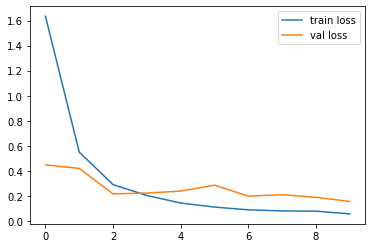

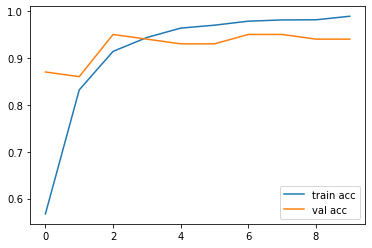

<Figure size 432x288 with 0 Axes>

In [143]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [144]:
model.save("birds_classifier.h5")

In [145]:
import tensorflow as tf

from keras.models import load_model

from keras.preprocessing import image


In [146]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [147]:
model=load_model('birds_classifier.h5')  

In [148]:
def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    x = np.expand_dims(x, axis=0)

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
    x = preprocess_input(x)

    preds = model.predict(x)
    return preds


In [149]:
import numpy as np

In [155]:
predict=model_predict("./test/AMERICAN BITTERN/1.jpg",model)

In [160]:
predict

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [161]:
result=np.argmax(predict, axis=1)

In [162]:
if result==0:
    result="ABBOTTS BABBLER"
elif result==1:
    result="ABBOTTS BOOBY"
elif result==2:
    result="ABYSSINIAN GROUND HORNBILL"
elif result==3:
    result="AFRICAN CROWNED CRANE"
elif result==4:
    result="AFRICAN EMERALD CUCKOO"
elif result==5:
    result="AFRICAN FIREFINCH"
elif result==6:
    result="AFRICAN OYSTER CATCHER"
elif result==7:
    result="ALBATROSS"
elif result==8:
    result="ALBERTS TOWHEE"
elif result==9:
    result="ALEXANDRINE PARAKEET"
elif result==10:
    result="ALPINE CHOUGH"
elif result==11:
    result="ALTAMIRA YELLOWTHROAT"
elif result==12:
    result="AMERICAN AVOCET"
elif result==13:
    result="AMERICAN BITTERN"
elif result==14:
    result="AMERICAN COOT"
elif result==16:
    result="AMERICAN GOLDFINCH"
elif result==17:
    result="AMERICAN KESTREL"
elif result==18:
    result="AMERICAN PIPIT"
elif result==19:
    result="AMERICAN REDSTART"
else:
    result="AMETHYST WOODSTAR"

In [163]:
result

'AMERICAN BITTERN'